# Min-Norm and Dual Approximation

## Dual approximation

### Dual Approximation theorem
Let $\{y_1, y_2, ..., y_m\}$ be linearly independent vectors in a Hilbert space S. Let $M = span(y_1, y_2, ...,y_m)$. The element $x \in S$ that satisfies the constraints:

$$
\langle x, y_1 \rangle = b_1\\
\vdots\\
\langle x, y_m \rangle = b_m
$$

and which has minimum norm is also in $M$. $x$ is given by: 
\begin{equation*}
x = \sum_{i=1}^{m}c_i y_i
\end{equation*}
where the coefficients $c_i$ satisfy
\begin{equation*}
\begin{bmatrix} \langle y_j, y_i \rangle \end{bmatrix}
\mathbf{c}
= 
\mathbf{b}
\end{equation*}

For a proof of this theorem, see pp. 179-181 in Moon's book.

The matrix $\begin{bmatrix} \langle y_j, y_i \rangle \end{bmatrix}$ is also known as the Gramian. If A is of the form: 
$$
A = \begin{bmatrix} y_1^H \\ \vdots \\ y_m^H \end{bmatrix}
$$
then the Gramian is $R = A A^H$.
Using this notation, if we have the constraints in the form of a matrix $A$, then the min-norm solution that satisfies the constraints can be found as:
$$
\mathbf{\hat{x}} = A^H (A A^H)^{-1} \mathbf{b}
$$

## Minimum-norm solution to underdetermined system of equations
An underdetermined system of equations is one with fewer equations than variables. Recall that for this type of system, there are two possibilities: an infinite number of solutions or no solution (if the equations are inconsistent). Here, we will address the case of an infinite number of solutions.

In array form, the problem is formulated as $A\mathbf{x} = \mathbf{b}$, where $A$ is an $m \times n$ matrix, with $m < n$.


### Simple example

Let's take the system:
\begin{equation*}
\begin{bmatrix} 1 & 2 & 3 \\ 5 & 3 & 1 \end{bmatrix}
\begin{bmatrix} x \\ y \\ z \end{bmatrix}
= \begin{bmatrix} 0 \\ 2 \end{bmatrix}
\end{equation*}

This can be thought of as two planes in $\mathbb{R}^3$, given by:
\begin{equation*}
x + 2y + 3z = 0
\end{equation*}
\begin{equation*}
5x + 3y + z = 2
\end{equation*}

It can be shown algebraically that the intersection of these planes is a line given by:
$$
\begin{cases}
x = t \\
y = \frac{6}{7} - 2t \\
z = -\frac{4}{7} + t
\end{cases}\\ \forall t \in \mathbb{R}
$$

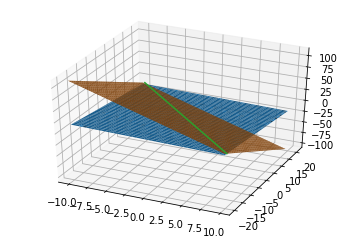

In [3]:
# Visualize the intersection of 2 planes

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

A = np.array([(1,2,3),(5,3,1)])
b = np.array([(0),(2)])

fig = plt.figure()
ax = fig.gca(projection='3d')
# data for planes
x1 = np.arange(-10,10,0.25)
y1 = np.arange(-20,20,0.25)
x1, y1 = np.meshgrid(x1, y1)
z1 = (b[0] - A[0,0]*x1 - A[0,1]*y1) / A[0,2]
x2 = np.arange(-10,10,0.25)
y2 = np.arange(-20,20,0.25)
x2,y2 = np.meshgrid(x2,y2)
z2 = (b[1] - A[1,0]*x2 - A[1,1]*y2) / A[1,2]

# line
tL = np.arange(-10,10,0.25)
xL = tL
yL = 6/7 - 2*tL
zL = -4/7 + tL

ax.plot_surface(x1, y1, z1)
ax.plot_surface(x2, y2, z2)
ax.plot(xL, yL, zL)

ax.view_init(elev=35., azim=-65)

plt.show()

Rather than finding all possible solutions for $\mathbf{x}$, we will choose the solution that has the minimum norm.

$$
\mathbf{\hat{x}} = A^H (A A^H)^{-1} \mathbf{b} \\
\mathbf{\hat{x}} = \begin{bmatrix} 0.3810 \\ 0.0952 \\ -0.1905 \end{bmatrix}
$$

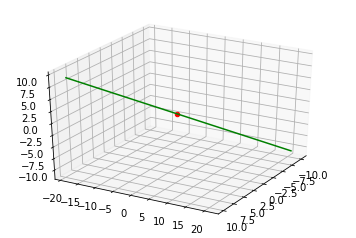

In [2]:
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')

ax2.plot(xL, yL, zL, c='g')
ax2.scatter(0.3810, 0.0952, -0.1905, c='r')

ax2.view_init(elev=30, azim=30)
plt.show()

This was a simple finite-dimensional example, but the concept extends to infinite dimensional spaces. If there are a finite number of constraints that can be written as inner products, then it can be framed in terms of the dual approximation theorem.

## Applied example
Some problems involving sets of continuous functions can be solved with finite matrices although the solutions are in an infinite dimensional space, as long as the constraints can be written as inner products and the solution space is a Hilbert space, such as $L_2$.

Suppose you know the dynamics of a system to be:
$$
\ddot{y} + 5\dot{y} + 6y = 7\dot{u} + u
$$

We'd like to find the input $u(t)$ from $t = 0$ to $t=5$ that will move the system to position $y=10$ with the least amount of energy, and also with the condition that $\int_0^5 u(t) dt = 0$.

The energy of a signal $u(t)$ is
$$\int_0^T \lvert\lvert u(t) \rvert\rvert^2 dt$$
which is the square of the $L_2$ norm. Since minimizing the energy also means minimizing the norm, this suggests the use of the dual approximation theorem. 

Since we're solving for $u$, we want to write inner product constraints in the form:
$$ 
\langle u, y_1 \rangle = b_1 \\
\langle u, y_2 \rangle = b_2$$

The final position constraint can be written as $y(5) = 10 = \langle u(t) , h(5-t) \rangle$, since this $L_2$ norm is the convolution integral.

The last condition can be written as $\langle u(t) , 1 \rangle = 0$.

We have $b = \begin{bmatrix} 10 \\ 0 \end{bmatrix}$ from these constraint equations.

$h(t)$ can be found by finding $Y(s)/U(s)$ in the Laplace domain on the dynamics equation, and then going back to time domain. Letting $y_1 = h(5-t)$ and $y_2 = 1$, we can calculate the needed inner products for the Gramian, then solve algebraically for $c1$ and $c2$.

Then $u(t)$ is simply a linear combination of $y_1$ and $y_2$:
$$u(t) = c_1 y_1 + c_2 y_2$$
